Develop a Neural Network predective model for the Cancer Survival Dataset

In [1]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
data = pd.read_csv("E:\Cyber World\Visual studio code\Haberman.csv")
data.head

<bound method NDFrame.head of      30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]>

<bound method NDFrame.describe of      30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]>


array([[<AxesSubplot:title={'center':'30'}>,
        <AxesSubplot:title={'center':'64'}>],
       [<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'1.1'}>]], dtype=object)

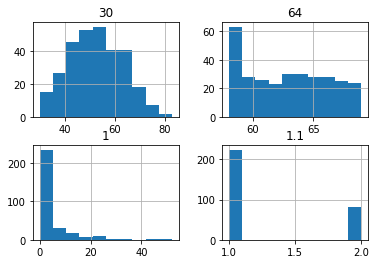

In [2]:
print(data.describe)
pyplot.show()
data.hist()

In [3]:
from collections import Counter
columns = ['age', 'year', 'nodes', 'class']
data = pd.read_csv('E:\Cyber World\Visual studio code\Haberman.csv', header=None, names=columns)
# summarise the class distribution
target = data['class'].values
Counter = Counter(target)
for k, v in Counter.items():
    per = v/len(target)*100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k,v,per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [4]:
#Neural Network Learning Dynamics
X, y = data.values[:, :-1], data.values[:, -1]
#ensure all data are floating point values
X = X.astype('float32')
#encode strings to integer
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)

In [5]:
n_features = X.shape[1]
#define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:
#fit model
history = model.fit(X_train,y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
#predict the model
yhat = model.predict_classes(X_test)
#evaluate predicitions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.765
C:\Users\Akhilesh Ranjan Kr\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


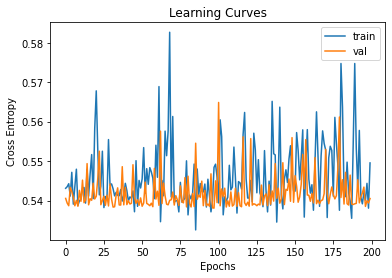

In [40]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()